In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('/content/property_details.csv', error_bad_lines=False)

<ipython-input-26-7ce419884dfd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/property_details.csv', error_bad_lines=False)
Skipping line 28470: expected 8 fields, saw 13

Skipping line 142018: expected 8 fields, saw 9

<ipython-input-26-7ce419884dfd>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/property_details.csv', error_bad_lines=False)


In [8]:
data.head()

,City,Region,Property Type,Size(sqft),Bedrooms,Bathrooms,Price,Image URL
0,Gulshan,Dhaka,Apartment,"2,950",4,4,200000.0,https://images-cdn.bproperty.com/thumbnails/15...
1,Mohammadpur,Dhaka,Apartment,"1,100",3,2,15000.0,https://images-cdn.bproperty.com/thumbnails/15...
2,Khulshi,Chattogram,Apartment,"1,500",3,3,30000.0,https://images-cdn.bproperty.com/thumbnails/85...
3,Baridhara,Dhaka,Apartment,"3,600",3,3,320000.0,https://images-cdn.bproperty.com/thumbnails/15...
4,Baridhara,Dhaka,Apartment,"2,300",3,3,85000.0,https://images-cdn.bproperty.com/thumbnails/14...


In [9]:
data.columns

Index(['City', 'Region', 'Property Type', 'Size(sqft)', 'Bedrooms',
       'Bathrooms', 'Price', 'Image URL'],
      dtype='object')

# Dropping the unnecessary columns


In [28]:
data.drop(["Image URL"],axis = 1, inplace = True)
data.head(5)

,City,Region,Property Type,Size(sqft),Bedrooms,Bathrooms,Price
0,Gulshan,Dhaka,Apartment,"2,950",4,4,200000.0
1,Mohammadpur,Dhaka,Apartment,"1,100",3,2,15000.0
2,Khulshi,Chattogram,Apartment,"1,500",3,3,30000.0
3,Baridhara,Dhaka,Apartment,"3,600",3,3,320000.0
4,Baridhara,Dhaka,Apartment,"2,300",3,3,85000.0


# Checking For null values

In [11]:
data.isnull().sum()

City             0
Region           0
Property Type    0
Size(sqft)       0
Bedrooms         0
Bathrooms        0
Price            1
dtype: int64

# I will handle the missed value now using forward fill,which will replace the NULL values with the value from the previous row.

In [29]:
data.Price.fillna(method = "ffill", inplace = True)
data.isnull().sum()

City             0
Region           0
Property Type    0
Size(sqft)       0
Bedrooms         0
Bathrooms        0
Price            0
dtype: int64

In [30]:
Region_type = data['Region'].value_counts()
Region_type

Dhaka         161018
Chattogram     33756
1,600              1
Name: Region, dtype: int64

In [24]:
data['Region'] = pd.to_numeric(data['Region'], errors='coerce')

data = data[data['Region'] != 1600]

Region_type = data['Region'].value_counts()
print(Region_type)

Series([], Name: Region, dtype: int64)


In [23]:
Region_type = data['Region'].value_counts()
Region_type

Dhaka         161018
Chattogram     33756
1,600              1
Name: Region, dtype: int64

In [39]:
data = data[data['Region'] != '1,600']

Region_type = data['Region'].value_counts()
print(Region_type)

Dhaka         161018
Chattogram     33756
Name: Region, dtype: int64


In [49]:
Property_type = data['Property Type'].value_counts()
Property_type

Apartment    192852
Residence      1921
Apartme           1
Name: Property Type, dtype: int64

In [50]:
data = data[data['Property Type'] != 'Apartme']

Property_type = data['Property Type'].value_counts()
print(Property_type)

Apartment    192852
Residence      1921
Name: Property Type, dtype: int64


# From here, we can see that in dhaka, 82.67% houses are available for rent and a small portion of the houses are from Chittagong

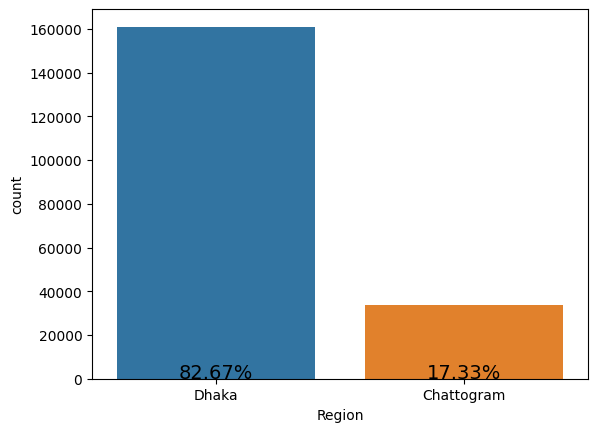

In [40]:
# Assuming 'type' is the column you want to visualize
sns.countplot(x='Region', data=data)

# Calculate the percentage and add it to the plot
Region_type = data['Region'].value_counts(normalize=True) * 100
for i in range(Region_type.shape[0]):
    num = Region_type.values[i]
    text = "{:0.2f}%".format(num)
    plt.text(i, num+100, text, ha="center", color="k", fontsize=14)

plt.show()

# Let's Compare price between Dhaka and Chittagong region

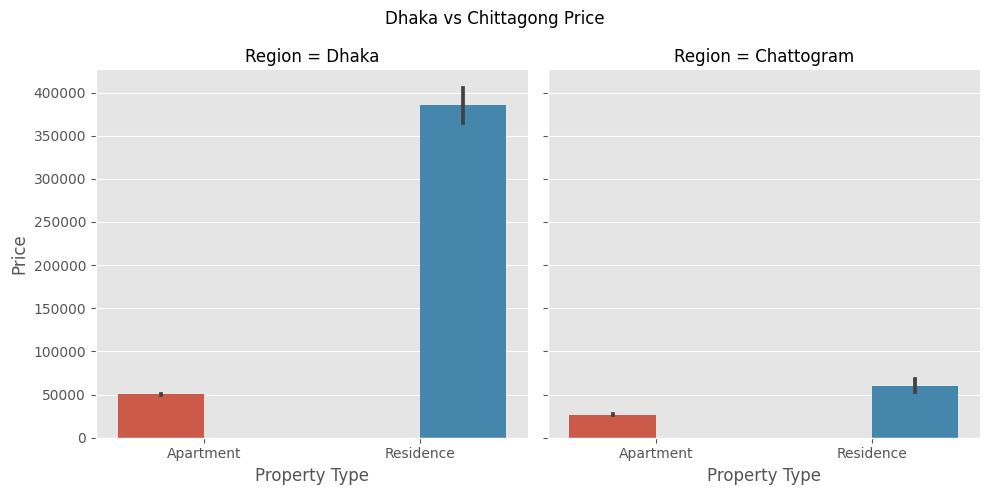

In [51]:
plt.rcParams['figure.figsize'] = (9,8)
sns.catplot(x = "Property Type", y = "Price", col = "Region", hue = "Property Type",
            data = data, kind = "bar")
plt.suptitle("Dhaka vs Chittagong Price")
plt.tight_layout()
plt.show()

# The graph shows the average price of apartments and residences in Dhaka and Chittagong regions. We can see that the average price difference between Dhaka and Chittagong is very high. Dhaka is way more expensive than Chittagong. Also the building type does not matter for pricing in Chittagong.

In [52]:
data.to_csv('cleaned_data.csv', index=False)